# Homework 2 - Esercizio 1 
## Pierluigi Compagnone

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx

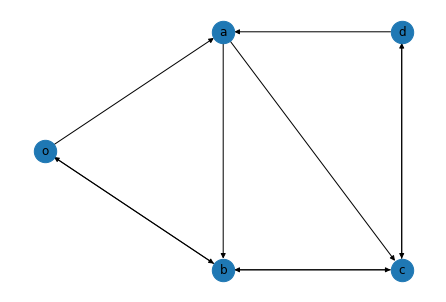

In [2]:
G = nx.DiGraph()
G.add_edges_from([("o","a"),("o","b"),("a","b"),("a","c"),("b","o"),("b","c"),("c","b"),("c","d"),("d","a"),("d","c")])

pos = {"o":[-2,0], "a":[0,1], "b":[0,-1], "c":[2,-1], "d":[2,1]}

nodes_names = ["o", "a", "b", "c", "d"]

#plotting G

nx.draw(G,pos, with_labels=True, node_size = 500)

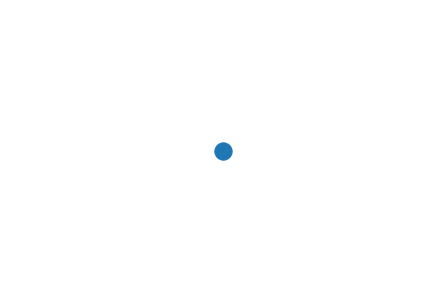

Aperiodic:  True 



In [3]:
# Plot the condensation graph to check that there is only one sink

cond_G = nx.algorithms.components.condensation(G)
nx.draw(cond_G)
plt.show()

# Check if the graph is aperiodic

ap = nx.algorithms.dag.is_aperiodic(G)
print("Aperiodic: ",ap, "\n")

In [4]:
Lambda = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/2, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0]]

w = np.sum(Lambda, axis=1)
w_star = np.max(w)

#calculate matrix Q

Q = Lambda/w_star 
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))

#calculate the normalized transition matrix

D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

#compute pi_bar

values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar," \n")

pi_bar= [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]  



**(a)**  What is, according to the simulations, the average time it takes a particle that starts in node a to leave the node and then return to it?

In [5]:
#set origin and destination nodes. In this case they are the same, Thus the particle will return to the same node.

origin = 1
destination = 1

n_iteration = 100000

Q_cum = np.cumsum(Q, axis=1)

#store the return times

return_times = []

for it in range(n_iteration):
    
    #reinitialize at each iteration
    
    #keep trace of the visited states
    
    pos = [origin]
    
    #store the times spent before transitions
    
    transition_times = [0]
    
    #calculate the time at which first transition happens
    
    t_next = -np.log(np.random.rand())/w_star
    
    i = 1
    
    while True:
        
        #extract next step to visit according to the probability in Q
        
        pos.append(int(np.argwhere(Q_cum[pos[i-1]] > np.random.rand())[0]))
        
        #store the time instant of the current transition
        
        transition_times.append(transition_times[i-1] + t_next)
        
        #compute the waiting time to the next transition
        
        t_next = -np.log(np.random.rand())/w_star

        #if the node coincides with the destination stop the cycle and store the return time 
        
        if pos[i] == destination:
            return_times.append(transition_times[i])
            break
            
        i += 1

print("the average return time of node 'a' is: ", np.mean(return_times), "\n")

the average return time of node 'a' is:  6.729507122083826 



**(b)** Compute to the theoretical return-time of a

In [6]:
avg_returnTimeA = 1/(w[1]*pi_bar[1])
print("the average return time of node 'a' is: ", avg_returnTimeA, "\n")

the average return time of node 'a' is:  6.750000000000007 



In [7]:
#compute the quadratic error between the simulation and the theoretical result

quad_err_ret = (avg_returnTimeA - np.mean(return_times))**2

print("the quadratic error is: ", quad_err_ret, "\n")


the quadratic error is:  0.0004199580452875188 



**(b)** What is, according to the simulations, the average time it takes to move from node o to node
d?

In [8]:
#set origin and destination nodes.

origin = 0
destination = 4

n_iteration = 100000

Q_cum = np.cumsum(Q, axis=1)

#store the hitting times 

hitting_times = []

for it in range(n_iteration):

    #reinitialize at each iteration
    
    #keep trace of the visited states
    
    pos = [origin]
    
    #store the times spent before transitions
    
    transition_times = [0]
    
    #calculate the time at which first transition happens
    
    t_next = -np.log(np.random.rand())/w_star
    
    i = 1
    
    while True:
        
        #extract next step to visit according to the probability in Q
        
        pos.append(int(np.argwhere(Q_cum[pos[i-1]] > np.random.rand())[0]))
        
        # store the time instant of the current transition
        
        transition_times.append(transition_times[i-1] + t_next)
        
        # compute the waiting time to the next transition
        
        t_next = -np.log(np.random.rand())/w_star
        
        #stop the cycle and store the hitting time, if particle arrive to d.
        
        if pos[i] == destination:
            hitting_times.append(transition_times[i])
            break
        
        i += 1

print("the average hitting time from 'o' to 'd' is: ", np.mean(hitting_times), "\n")


the average hitting time from 'o' to 'd' is:  8.77837363749393 



**(d)** Compute to the theoretical hitting-time from o to d

In [9]:
#calculate the theoretical hitting time from o to d

A = [
[1, -2/3, -1/3, 0],
[0, 1, -3/4, -1/4],
[-1/2, 0, 1, -1/2],
[0, 0, -0.33, 1]]

b = [1/w[0], 1/w[1], 1/w[2], 1/w[3]]

res = np.linalg.solve(A, b)
print("the average hitting time from 'o' to 'd' is: ", res[0], "\n")

the average hitting time from 'o' to 'd' is:  8.750533049040511 



In [10]:
#compute the quadratic error between the simulation and the theoretical result

quad_err_hit = (res[0] - np.mean(hitting_times))**2

print("the quadratic error is: ", quad_err_hit, "\n")


the quadratic error is:  0.0007750983654326333 



**(e)** Interpret the matrix Λ as the weight matrix of a graph G = (V,E,Λ), and simulate the French-DeGroot dynamics on G with an arbitrary initial condition x(0).

Consensus vector: [12.17390625 12.17377994 12.17419507 12.17348103 12.17427622]


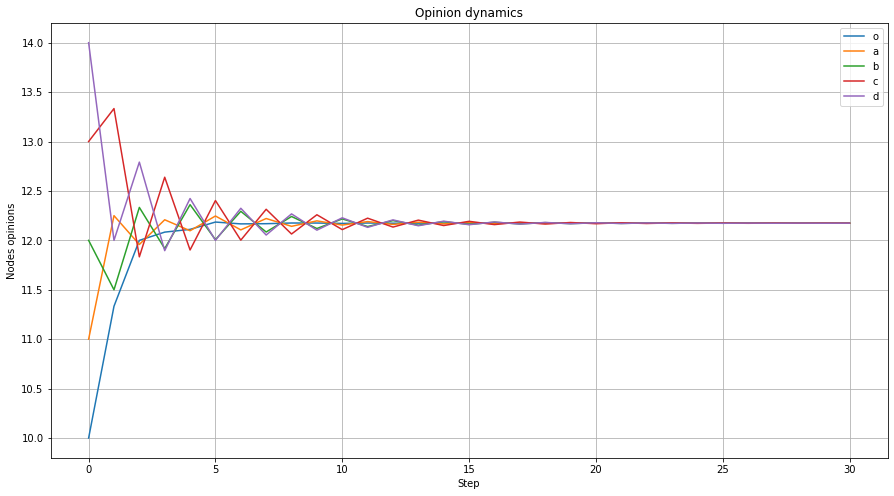

In [11]:
# arbitrary initial condition
opinions = []
x = [10, 11, 12, 13, 14]
opinions.append(x)

# Compute the consensus

for _ in range(30):
    x = P @ x
    opinions.append(x)

print("Consensus vector:", x)

# Plot the opinions evolution

opinions = np.array(opinions)
plt.figure(figsize=[15,8])

for x in range(opinions.shape[1]):
    plt.plot(opinions[:,x])
    
plt.grid()
plt.legend(nodes_names)
plt.title("Opinion dynamics")
plt.xlabel("Step")
plt.ylabel("Nodes opinions")
plt.show()

**(f)** Assume that the initial state of the dynamics for each node $i ∈ V$ is given by $x_i(0) = ξ_i$, where
$\{ξ_i\}_{i∈V}$ are i.i.d random variables with variance $σ^2$. Compute the variance of the consensus
value, and compare your results with numerical simulations.

In [12]:
#compute the invariant distribution

values,vectors = np.linalg.eig(P.T)
index = np.argmax(values.real)
pi = vectors[:,index].real
pi = pi/np.sum(pi)

print("invariant distribution: ", pi)

#define the variance of the distribution of the initial conditions

initial_var = 25

#calculate the varianche at the consensus

final_var = initial_var * np.sum(pi**2)

print("The variance of the consensus value is: ", final_var, "\n")

invariant distribution:  [0.13043478 0.17391304 0.26086957 0.26086957 0.17391304]
The variance of the consensus value is:  5.340264650283554 



In [13]:
#define the variance of the distribution of the initial conditions

initial_var = 25

n_iterations = 100000

#store the consensus values related to different initial conditions

consensus_list = []

for i in range(n_iterations):
    
    #extract a random initial condition from the gaussian distribution
    
    x = np.random.normal(0,np.sqrt(initial_var),5)
    
    #calclulate the consesus value
    
    cons = pi @ x
    consensus_list.append(cons)
    
    
print("The variance of the consensus value according to the simultaion is: ", np.var(consensus_list), "\n")

The variance of the consensus value according to the simultaion is:  5.3440901850421625 



In [14]:
#compute the quadratic error between the simulation and the theoretical result

quad_err_var = (final_var - np.var(consensus_list))**2

print("the quadratic error is: ", quad_err_var, "\n")

the quadratic error is:  1.4634716189324987e-05 



**(g)** Remove the edges $(d,a)$ and $(d,c)$. Describe and motivate the asymptotic behaviour of the
dynamics. If the dynamics converges to a consensus state, how is the consensus value related
to the initial condition $x(0)$? Assume that the initial state of the dynamics for each node
$i ∈ V$ is given by $x_i(0) = ξ_i$, where $\{ξ_i\}_{i∈V}$ are i.i.d random variables with variance $σ^2$.
Compute the variance of the consensus value. Motivate your answer.

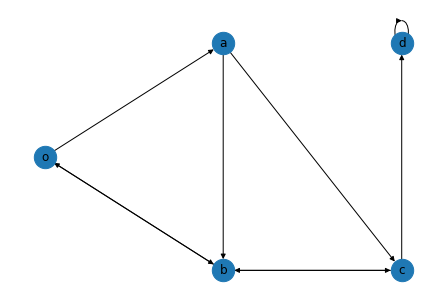

In [15]:
G_g = nx.DiGraph()
G_g.add_edges_from([("o","a"),("o","b"),("a","b"),("a","c"),("b","o"),("b","c"),("c","b"),("c","d"),("d","d")])

pos_g = {"o":[-2,0], "a":[0,1], "b":[0,-1], "c":[2,-1], "d":[2,1]}

#plotting G_g

nx.draw(G_g,pos_g, with_labels=True, node_size = 500)

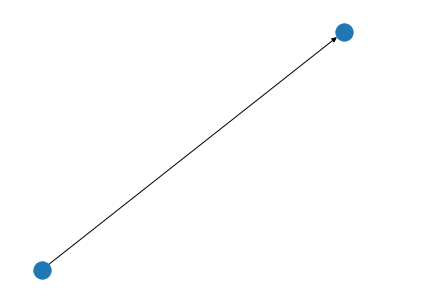

Aperiodic:  True 



In [16]:
# Plot the condensation graph to check that there is only one sink

cond_Gg = nx.algorithms.components.condensation(G_g)
nx.draw(cond_Gg)
plt.show()

# Check if the sink componenet is aperiodic

ap = nx.algorithms.dag.is_aperiodic(G_g.subgraph("d"))
print("Aperiodic: ", ap, "\n")

In [17]:
Lambda_1 = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/2, 0],
[0, 0, 1/3, 0, 2/3],
[0, 0, 0, 0, 1]]

w_1 = np.sum(Lambda_1, axis=1)
w_star_1 = np.max(w_1)

#calculate matrix Q1

Q_1 = Lambda_1/w_star_1 
Q_1 = Q_1 + np.diag(np.ones(len(w_1))-np.sum(Q_1,axis=1))

#calculate the normalized transition matrix

D_1 = np.diag(w_1)
P_1 = np.linalg.inv(D_1) @ Lambda_1

#compute pi_bar1

values_1,vectors_1 = np.linalg.eig(Q_1.T)
index_1 = np.argmax(values_1.real)
pi_bar_1 = vectors_1[:,index_1].real
pi_bar_1 = pi_bar_1/np.sum(pi_bar_1)
print("pi_bar_1=", pi_bar_1," \n")

pi_bar_1= [0. 0. 0. 0. 1.]  



Consensus vector: [13.93396453 13.94502981 13.94682607 13.97847375 14.        ]


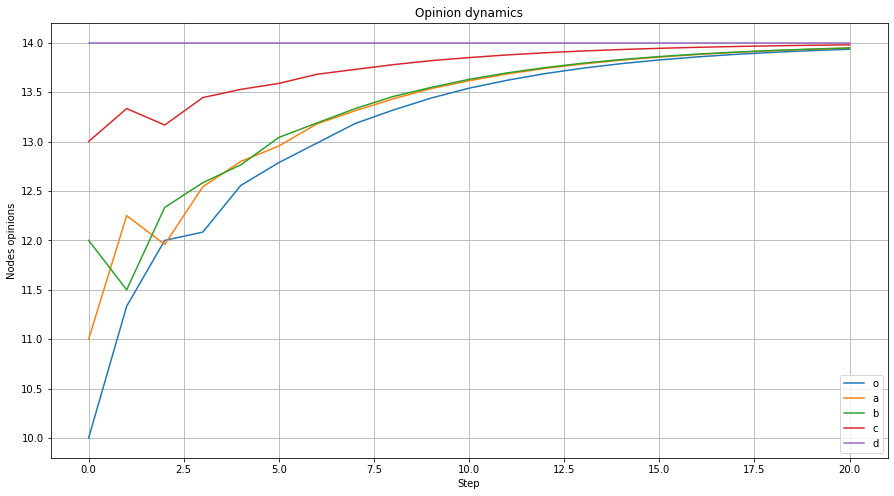

In [18]:
# arbitrary initial condition

opinions = []
x = [10, 11, 12, 13, 14]
opinions.append(x)

# Compute the consensus

for _ in range(20):
    x = P_1 @ x
    opinions.append(x)
print("Consensus vector:", x)

# Plot the opinions evolution

opinions = np.array(opinions)
plt.figure(figsize=[15,8])

for x in range(opinions.shape[1]):
    plt.plot(opinions[:,x])
    
plt.grid()
plt.legend(nodes_names)
plt.title("Opinion dynamics")
plt.xlabel("Step")
plt.ylabel("Nodes opinions")
plt.show()

In [19]:
#compute the invariant distribution

values,vectors = np.linalg.eig(P_1.T)
index = np.argmax(values.real)
pi_1 = vectors[:,index].real
pi_1 = pi_1/np.sum(pi_1)
print("invariant distribution of G_g: ", pi_1)

#define the variance of the distribution of the initial conditions

initial_var = 25

#calculate the varianche at the consensus

final_var = initial_var * np.sum(pi_1**2)

print("The variance of the consesu value is: ", final_var, "\n")

invariant distribution of G_g:  [0. 0. 0. 0. 1.]
The variance of the consesu value is:  25.0 



In [20]:
#define the variance of the distribution of the initial conditions

initial_var = 25

n_iterations = 100000

#store the consensus values related to different initial conditions

consensus_list = []

for i in range(n_iterations):
    
    #extract a random initial condition from the gaussian distribution
    
    x = np.random.normal(0,np.sqrt(initial_var),5)
    
    #calclulate the consesus value
    
    cons = pi_1 @ x
    consensus_list.append(cons)
    
    
print("The variance of the consesu value according to the simultaion is: ", np.var(consensus_list), "\n")

The variance of the consesu value according to the simultaion is:  25.044720570130433 



In [21]:
#compute the quadratic error between the simulation and the theoretical result

quad_err_var1 = (final_var - np.var(consensus_list))**2

print("the quadratic error is: ", quad_err_var1, "\n")

the quadratic error is:  0.001999929392791012 



**(h)** Consider the graph $(V,E,Λ)$, and remove the edges $(c,b)$ and $(d,a)$. Analyse the French-
DeGroot dynamics on the new graph. In particular, describe and motivate the asymptotic
behaviour of the dynamics in terms of the initial condition $x(0)$.

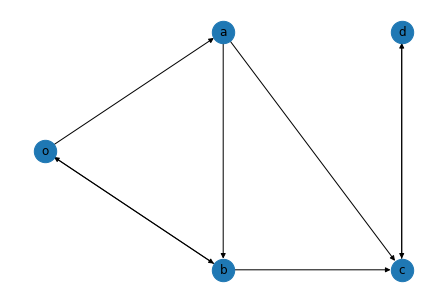

In [22]:
G_h = nx.DiGraph()
G_h.add_edges_from([("o","a"),("o","b"),("a","b"),("a","c"),("b","o"),("b","c"),("c","d"),("d","c")])

pos_h = {"o":[-2,0], "a":[0,1], "b":[0,-1], "c":[2,-1], "d":[2,1]}

#plotting G2

nx.draw(G_h,pos_h, with_labels=True, node_size = 500)

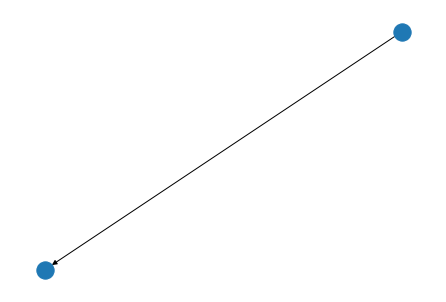

Aperiodic False


In [23]:
# Plot the condensation graph to check that there is only one sink

cond_Gh = nx.algorithms.components.condensation(G_h)
nx.draw(cond_Gh)
plt.show()

# Check if the sink componenet is aperiodic

ap = nx.algorithms.dag.is_aperiodic(G_h.subgraph(["c","d"]))
print("Aperiodic",ap)

In [24]:
Lambda_2 = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/2, 0],
[0, 0, 0, 0, 2/3],
[0, 0, 0, 1/3, 0]]

w_2 = np.sum(Lambda_2, axis=1)
w_star_2 = np.max(w_2)

#calculate matrix Q2

Q_2 = Lambda_2/w_star_2 
Q_2 = Q_2 + np.diag(np.ones(len(w_2))-np.sum(Q_2,axis=1))

#calculate the normalized transition matrix

D_2 = np.diag(w_2)
P_2 = np.linalg.inv(D_2) @ Lambda_2

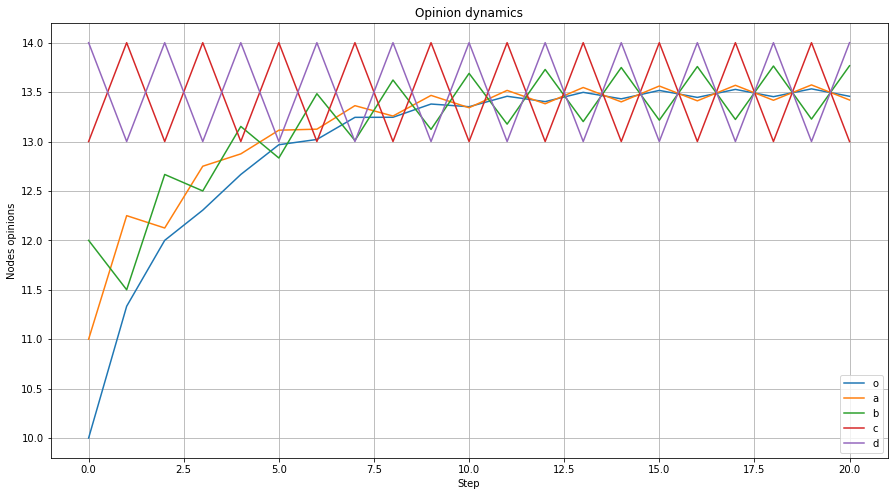

In [25]:
# arbitrary initial condition

opinions = []
x = [10, 11, 12, 13, 14]
opinions.append(x)

# Compute the consensus

for _ in range(20):
    x = P_2 @ x
    opinions.append(x)

# Plot the opinions evolution

opinions = np.array(opinions)
plt.figure(figsize=[15,8])

for x in range(opinions.shape[1]):
    plt.plot(opinions[:,x])
    
plt.grid()
plt.legend(nodes_names)
plt.title("Opinion dynamics")
plt.xlabel("Step")
plt.ylabel("Nodes opinions")
plt.show()